In [115]:
import pandas as pd

In [116]:
df = pd.read_csv('Smart_meter.csv')

In [117]:
df.head(1)

,Unnamed: 0,day,energy_sum,LCLid,avg_energy,uvIndex,moonPhase,avg_temperature,windBearing,dewPoint,cloudCover,windSpeed,pressure,humidity,is_holiday
0,0,2011-11-23,90.385,13,6.952692,1.0,0.94,7.085,229,6.29,0.36,2.04,1027.12,0.93,0


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       828 non-null    int64  
 1   day              828 non-null    object 
 2   energy_sum       828 non-null    float64
 3   LCLid            828 non-null    int64  
 4   avg_energy       828 non-null    float64
 5   uvIndex          828 non-null    float64
 6   moonPhase        828 non-null    float64
 7   avg_temperature  828 non-null    float64
 8   windBearing      828 non-null    int64  
 9   dewPoint         828 non-null    float64
 10  cloudCover       828 non-null    float64
 11  windSpeed        828 non-null    float64
 12  pressure         828 non-null    float64
 13  humidity         828 non-null    float64
 14  is_holiday       828 non-null    int64  
dtypes: float64(10), int64(4), object(1)
memory usage: 97.2+ KB


In [119]:
df['day'] = pd.to_datetime(df['day'])

In [120]:
#here we will try to extract features from the day column
df['Days'] = df['day'].dt.day
df['Month'] = df['day'].dt.month
df['Year'] = df['day'].dt.year

In [121]:
df.head(1)

,Unnamed: 0,day,energy_sum,LCLid,avg_energy,uvIndex,moonPhase,avg_temperature,windBearing,dewPoint,cloudCover,windSpeed,pressure,humidity,is_holiday,Days,Month,Year
0,0,2011-11-23,90.385,13,6.952692,1.0,0.94,7.085,229,6.29,0.36,2.04,1027.12,0.93,0,23,11,2011


In [122]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [123]:
sets = df.columns
sets

Index(['Unnamed: 0', 'day', 'energy_sum', 'LCLid', 'avg_energy', 'uvIndex',
       'moonPhase', 'avg_temperature', 'windBearing', 'dewPoint', 'cloudCover',
       'windSpeed', 'pressure', 'humidity', 'is_holiday', 'Days', 'Month',
       'Year'],
      dtype='object')

In [124]:
X = df[['LCLid', 'avg_energy', 'uvIndex', 'moonPhase',
       'avg_temperature', 'windBearing', 'dewPoint', 'cloudCover', 'windSpeed',
       'pressure', 'humidity', 'is_holiday', 'Days', 'Month', 'Year']]

Y = df['energy_sum']


In [125]:
print(X.shape)
print(Y.shape)

(828, 15)
(828,)


In [126]:
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [127]:
#LinearRegression Model
LR = LinearRegression()
LR.fit(X_train,y_train)


LinearRegression()

In [128]:
def metrices(x,y):
    y_p = LR.predict(x)
    
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y, y_p)

    # Mean Squared Error (MSE)
    mse = mean_squared_error(y, y_p)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # R-squared (R²)
    r_squared = r2_score(y, y_p)
    
    df_y = pd.DataFrame({'y_test' : y, 'y_pred' : y_pred})
    plt.figure(figsize=(15,12))

    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test.values, label='Actual')
    plt.ylabel("")
    plt.legend()
    plt.show()

    print("Mean Absolute Error:", f"{mae:.2f}")
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R-squared:", r_squared)
    return mae,mse,rmse,r_squared

In [129]:
#Creatin Dataframe to record the evaluation metrix values for all models 
# Storing each on Test,Train and Validation separately


col=['Model','MAE','MSE','RMSE','R_squared']
df_train = pd.DataFrame(columns=col)
df_test = pd.DataFrame(columns=col)
df_validation = pd.DataFrame(columns=col)


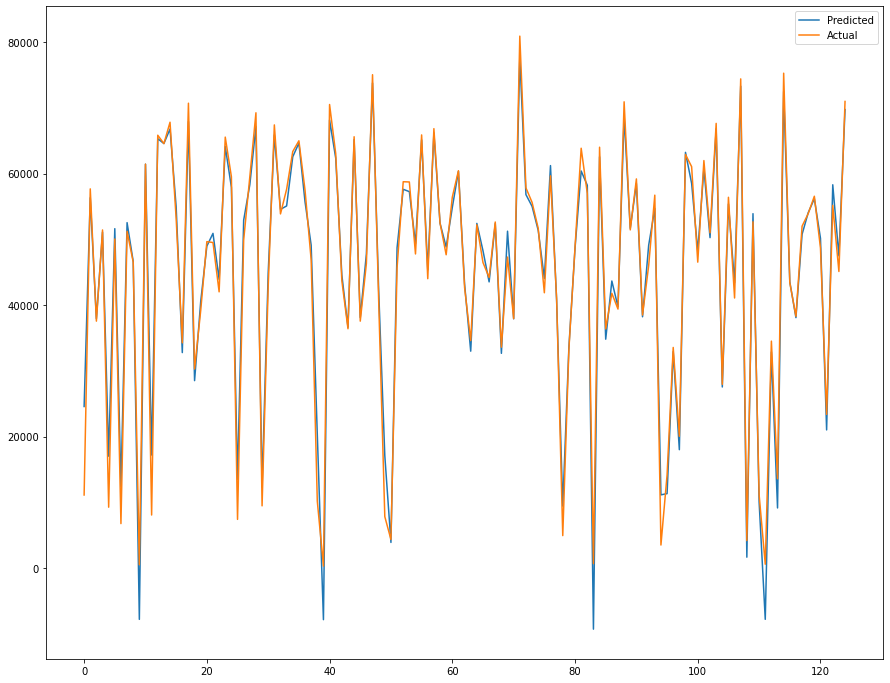

Mean Absolute Error: 2018.49
Mean Squared Error: 8695607.143324874
Root Mean Squared Error: 2948.8314877803505
R-squared: 0.9787118324041493


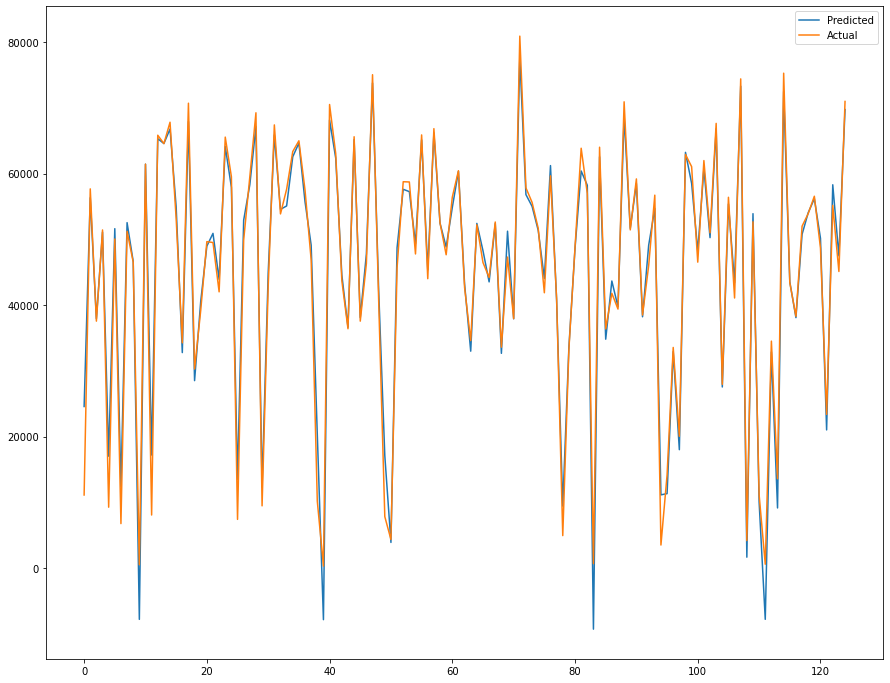

Mean Absolute Error: 1858.44
Mean Squared Error: 7193764.399037359
Root Mean Squared Error: 2682.119385679422
R-squared: 0.98224358244155


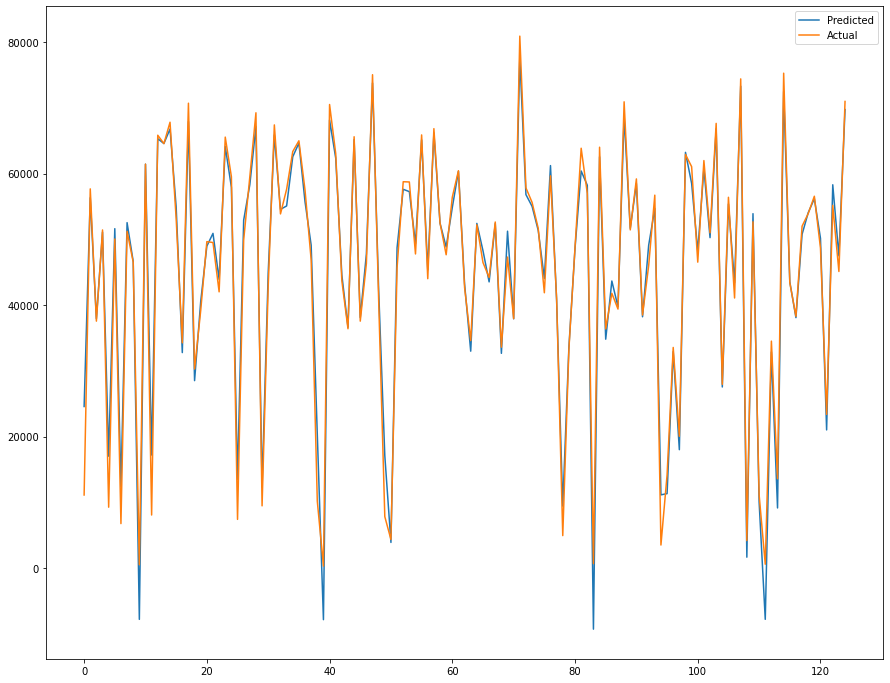

Mean Absolute Error: 2058.19
Mean Squared Error: 10117531.53942199
Root Mean Squared Error: 3180.8067434885115
R-squared: 0.9742572175751083


,Model,MAE,MSE,RMSE,R_squared
0,Linear_Regression,2058.186257,1.011753e+07,3180.806743,0.974257


In [130]:
# Linear Regression model to the datasets of matrix records
K = metrices(X_val,y_val)
df_validation.loc[0] = ["Linear_Regression",K[0],K[1],K[2],K[3]]
df_validation.head()

K2 = metrices(X_train,y_train)
df_train.loc[0] = ["Linear_Regression",K2[0],K2[1],K2[2],K2[3]]
df_train.head()

K3 = metrices(X_test,y_test)
df_test.loc[0] = ["Linear_Regression",K3[0],K3[1],K3[2],K3[3]]
df_test.head()

In [134]:
# Random forest Model
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=100, random_state=42)

RF.fit(X_train, y_train)

def metrices(x,y):
    y_p = RF.predict(x)
    
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y, y_p)

    # Mean Squared Error (MSE)
    mse = mean_squared_error(y, y_p)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # R-squared (R²)
    r_squared = r2_score(y, y_p)
    
    df_y = pd.DataFrame({'y_test' : y, 'y_pred' : y_pred})
    plt.figure(figsize=(15,12))

    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test.values, label='Actual')
    plt.ylabel("")
    plt.legend()
    plt.show()

    print("Mean Absolute Error:", f"{mae:.2f}")
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R-squared:", r_squared)
    return mae,mse,rmse,r_squared

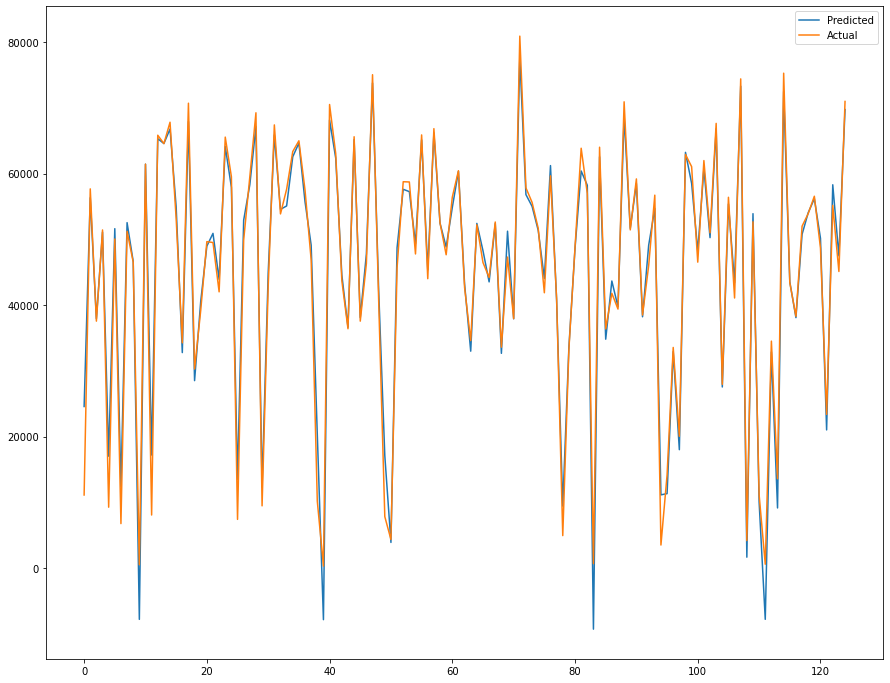

Mean Absolute Error: 355.83
Mean Squared Error: 256824.79032979786
Root Mean Squared Error: 506.7788376893789
R-squared: 0.9993712538884065


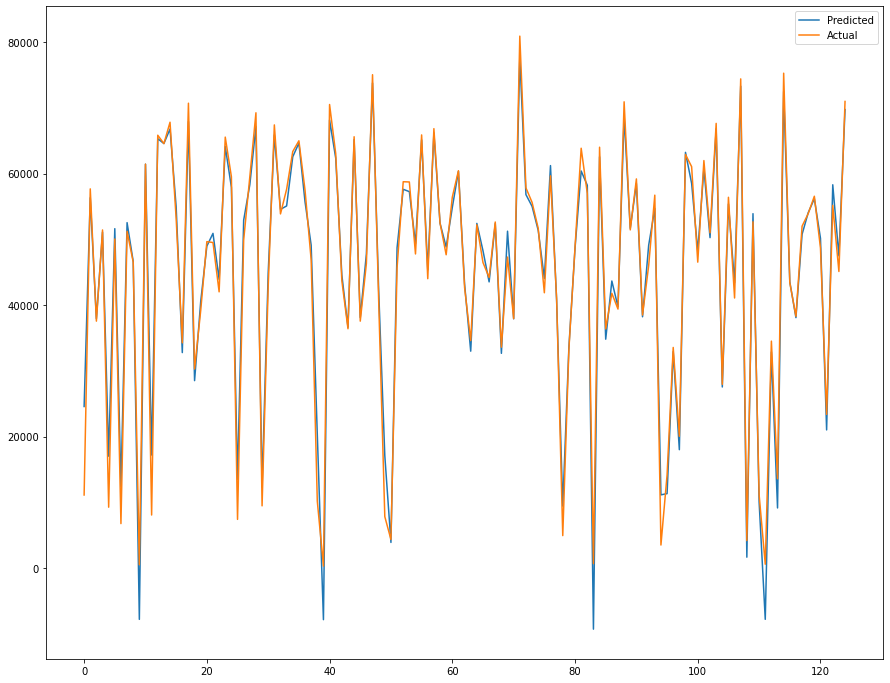

Mean Absolute Error: 200.58
Mean Squared Error: 337547.64685550076
Root Mean Squared Error: 580.9885083678513
R-squared: 0.9991668288491293


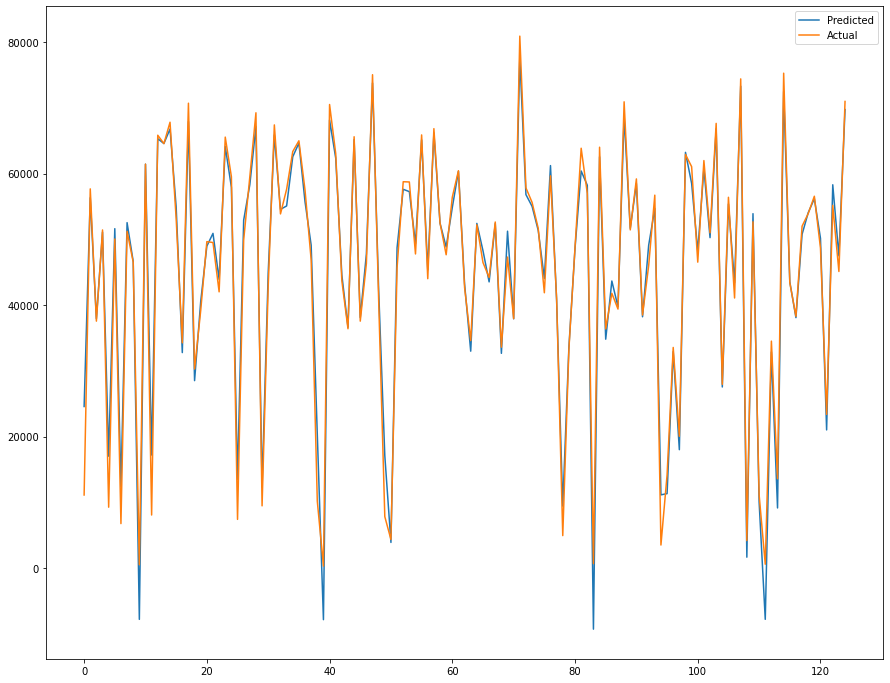

Mean Absolute Error: 489.79
Mean Squared Error: 667230.6786858566
Root Mean Squared Error: 816.8418933219921
R-squared: 0.9983023157257581


,Model,MAE,MSE,RMSE,R_squared
0,Linear_Regression,2058.186257,1.011753e+07,3180.806743,0.974257
1,Random Forest,489.794099,6.672307e+05,816.841893,0.998302


In [135]:
# Random forest matrix values in the record dataframe
K = metrices(X_val,y_val)
df_validation.loc[1] = ["Random Forest",K[0],K[1],K[2],K[3]]
df_validation.head()

K2 = metrices(X_train,y_train)
df_train.loc[1] = ["Random Forest",K2[0],K2[1],K2[2],K2[3]]
df_train.head()

K3 = metrices(X_test,y_test)
df_test.loc[1] = ["Random Forest",K3[0],K3[1],K3[2],K3[3]]
df_test.head()

In [138]:
# XG BOOST Model
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

xgb_model.fit(X_train, y_train)

def metrices(x,y):
    y_p = xgb_model.predict(x)
    
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y, y_p)

    # Mean Squared Error (MSE)
    mse = mean_squared_error(y, y_p)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # R-squared (R²)
    r_squared = r2_score(y, y_p)

    print("Mean Absolute Error:", f"{mae:.2f}")
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R-squared:", r_squared)
    
    df_y = pd.DataFrame({'y_test' : y, 'y_pred' : y_pred})
    plt.figure(figsize=(15,12))

    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test.values, label='Actual')
    plt.ylabel("")
    plt.legend()
    plt.show()
    return mae,mse,rmse,r_squared


Mean Absolute Error: 448.39
Mean Squared Error: 407229.2230866313
Root Mean Squared Error: 638.145142649093
R-squared: 0.9990030409828655


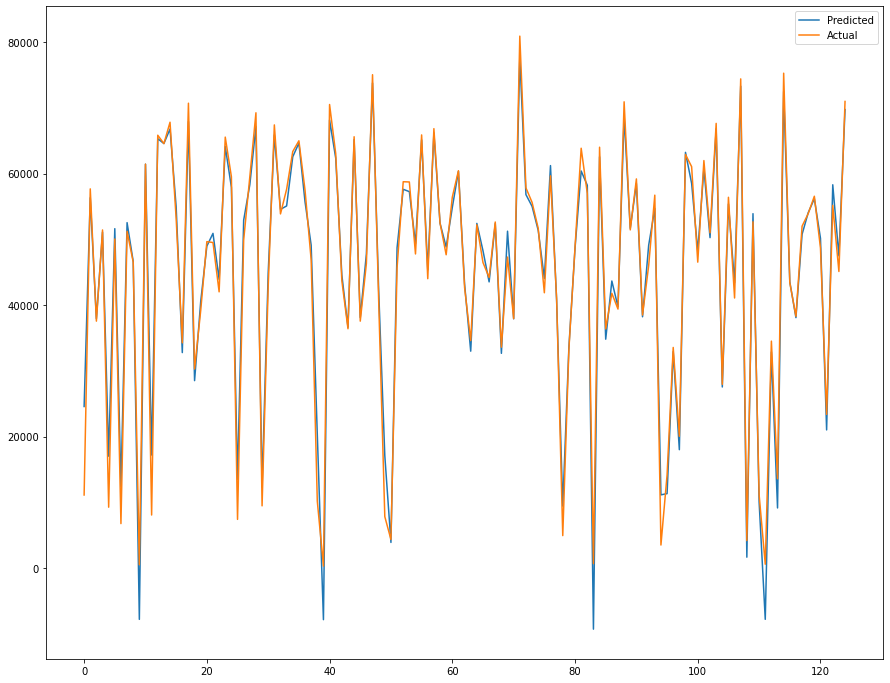

Mean Absolute Error: 4.53
Mean Squared Error: 42.20261666247316
Root Mean Squared Error: 6.496354105378891
R-squared: 0.9999998958309945


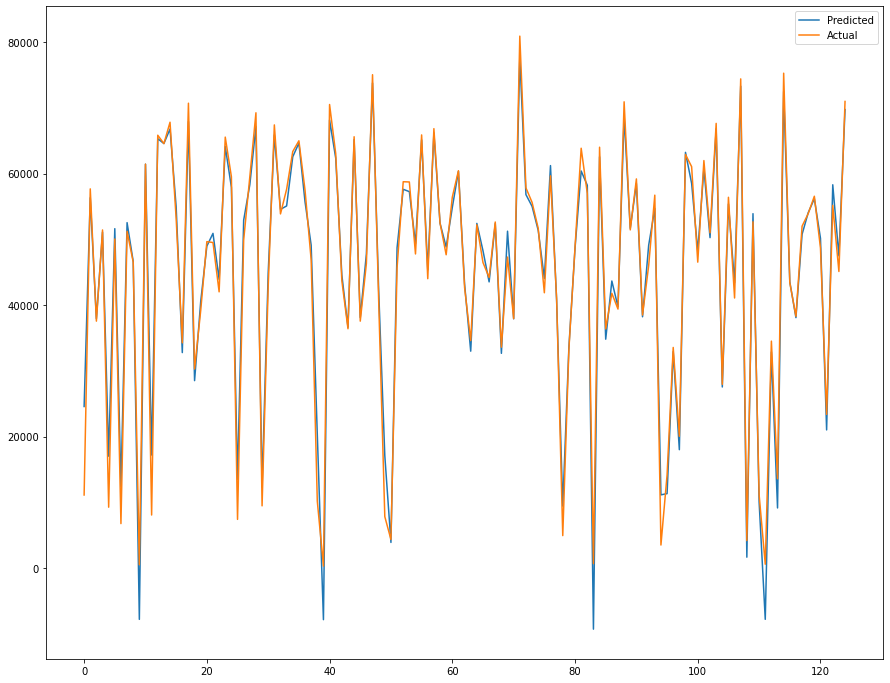

Mean Absolute Error: 434.73
Mean Squared Error: 871786.2312448414
Root Mean Squared Error: 933.6949347858974
R-squared: 0.9977818499320207


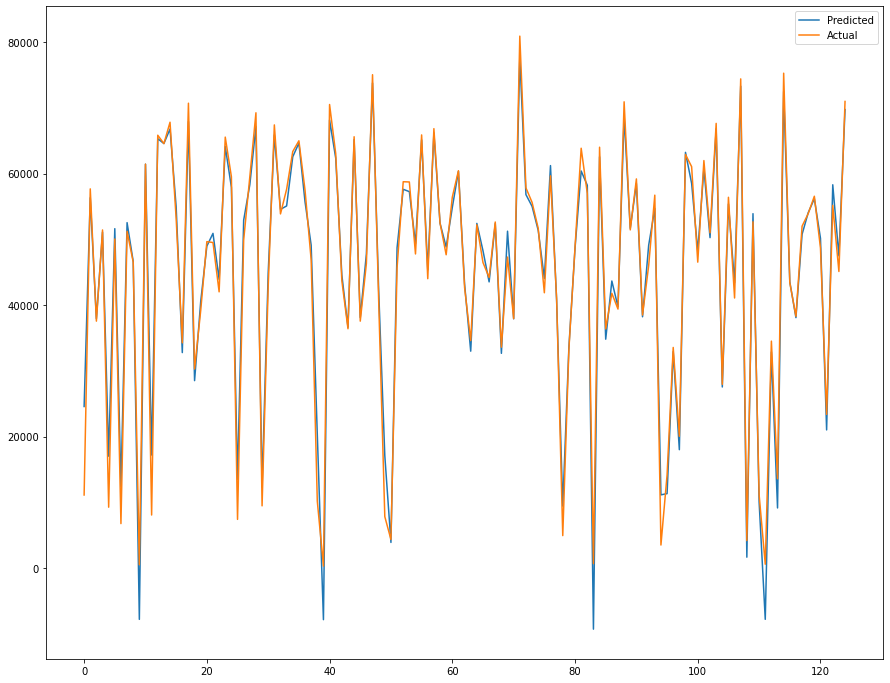

,Model,MAE,MSE,RMSE,R_squared
0,Linear_Regression,2058.186257,1.011753e+07,3180.806743,0.974257
1,Random Forest,489.794099,6.672307e+05,816.841893,0.998302
2,XG BOOST,434.727754,8.717862e+05,933.694935,0.997782


In [139]:
K = metrices(X_val,y_val)
df_validation.loc[2] = ["XG BOOST",K[0],K[1],K[2],K[3]]
df_validation.head()

K2 = metrices(X_train,y_train)
df_train.loc[2] = ["XG BOOST",K2[0],K2[1],K2[2],K2[3]]
df_train.head()

K3 = metrices(X_test,y_test)
df_test.loc[2] = ["XG BOOST",K3[0],K3[1],K3[2],K3[3]]
df_test.head()

In [140]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Model      3 non-null      object 
 1   MAE        3 non-null      float64
 2   MSE        3 non-null      float64
 3   RMSE       3 non-null      float64
 4   R_squared  3 non-null      float64
dtypes: float64(4), object(1)
memory usage: 144.0+ bytes


In [142]:
t.shape

(124,)

In [146]:
df_train

,Model,MAE,MSE,RMSE,R_squared
0,Linear_Regression,1858.442952,7.193764e+06,2682.119386,0.982244
1,Random Forest,200.584984,3.375476e+05,580.988508,0.999167
2,XG BOOST,4.525936,4.220262e+01,6.496354,1.000000


In [147]:
df_validation

,Model,MAE,MSE,RMSE,R_squared
0,Linear_Regression,2018.492372,8.695607e+06,2948.831488,0.978712
1,Random Forest,355.831891,2.568248e+05,506.778838,0.999371
2,XG BOOST,448.385395,4.072292e+05,638.145143,0.999003


In [148]:
df_test

,Model,MAE,MSE,RMSE,R_squared
0,Linear_Regression,2058.186257,1.011753e+07,3180.806743,0.974257
1,Random Forest,489.794099,6.672307e+05,816.841893,0.998302
2,XG BOOST,434.727754,8.717862e+05,933.694935,0.997782


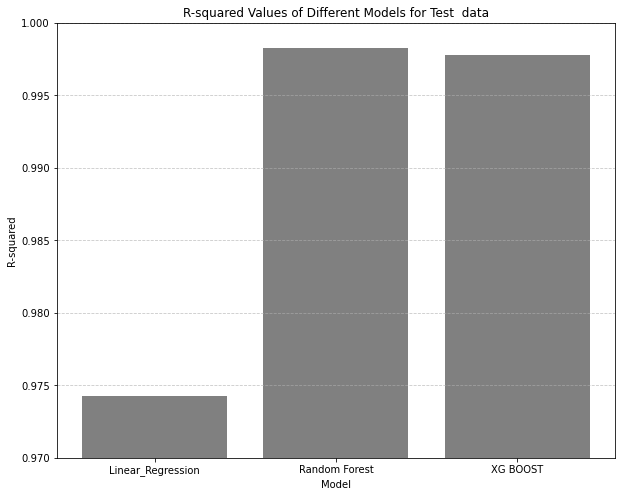

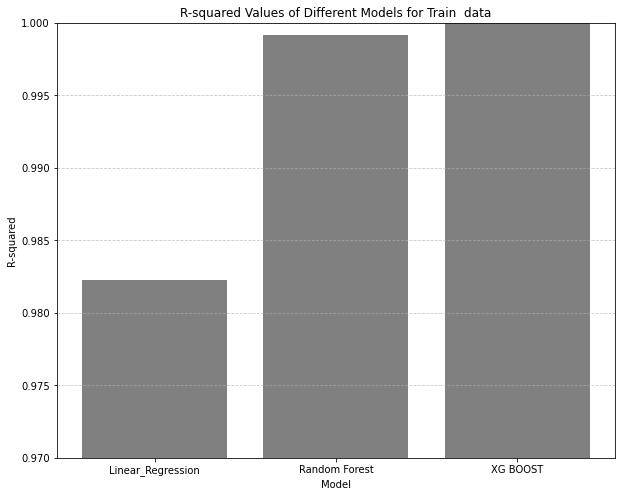

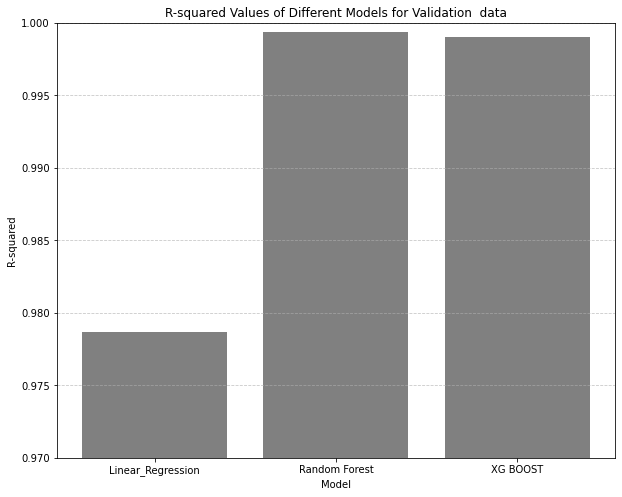

In [188]:
#Camparing the Matrix for all models with different data for R square values
def bar_plot_R_square():
    C = [df_test,df_train,df_validation]
    chart = ['Test ','Train ','Validation ']
    i = 0
    for c in C:
        df = c
#         df.set_index('Model', inplace=True)

        # Extract model names and R-squared values
        models = df.index
        r_squared_values = df['R_squared']

        # Create a bar chart
        plt.figure(figsize=(10, 8))
        
        plt.bar(models, r_squared_values, color='grey')

        # Customize the chart
        plt.xlabel('Model')
        plt.ylabel('R-squared')
        plt.title('R-squared Values of Different Models for {} data'.format(chart[i]))
        i += 1

        # Set the y-axis range from 0.95 to 1
        plt.ylim(0.97, 1)

        # Add grid lines for better readability
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Display the chart
        plt.show()
bar_plot_R_square()

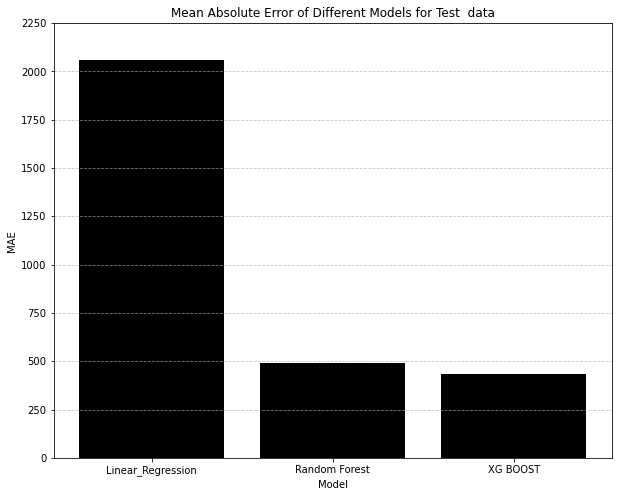

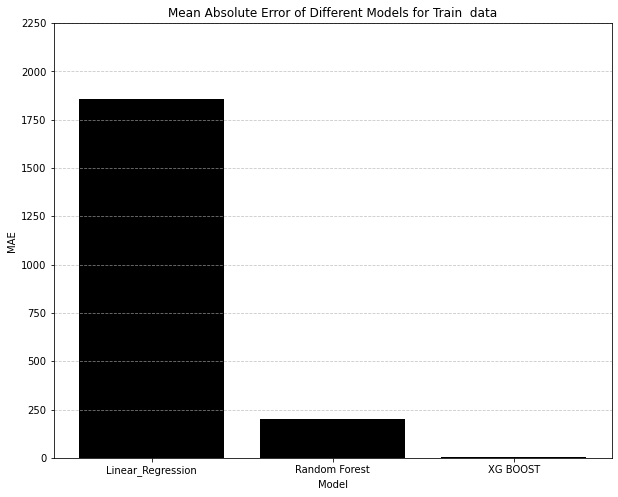

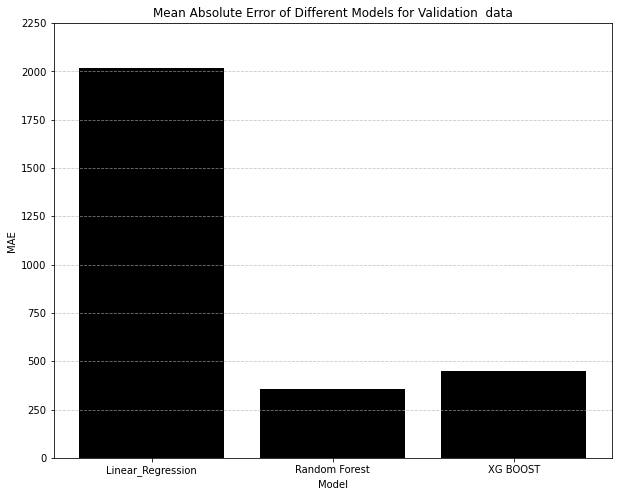

In [184]:
#Camparing the Matrix for all models with different data for Mean Absolute Error
def bar_plot_MAE():
    C = [df_test,df_train,df_validation]
    chart = ['Test ','Train ','Validation ']
    i = 0
    for c in C:
        df = c
#         df.set_index('Model', inplace=True)

        # Extract model names and MAE values
        models = df.index
        r_squared_values = df['MAE']

        # Create a bar chart
        plt.figure(figsize=(10, 8))
        plt.bar(models, r_squared_values, color='black')

        # Customize the chart
        plt.xlabel('Model')
        plt.ylabel('MAE')
        plt.title('Mean Absolute Error of Different Models for {} data'.format(chart[i]))
        i += 1
        # Set the y-axis range from 0 to 2000
        plt.ylim(0, 2250)

        # Add grid lines for better readability
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Display the chart
        plt.show()
bar_plot_MAE()

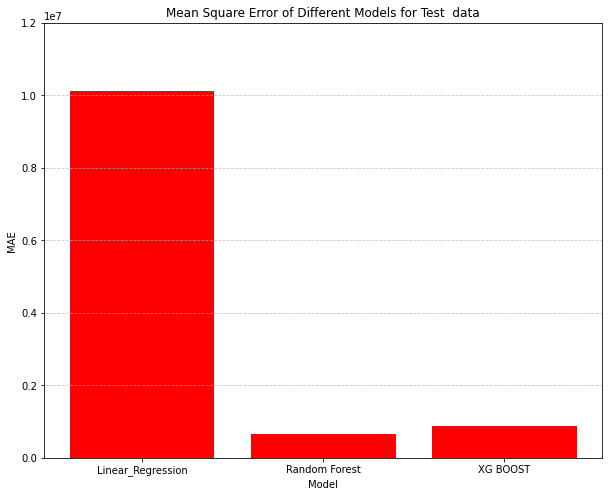

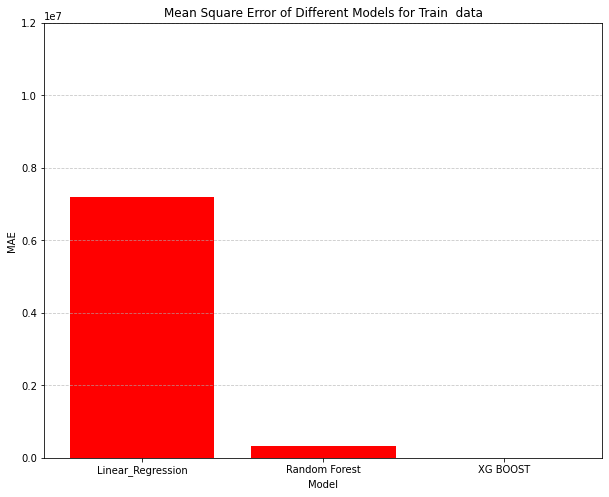

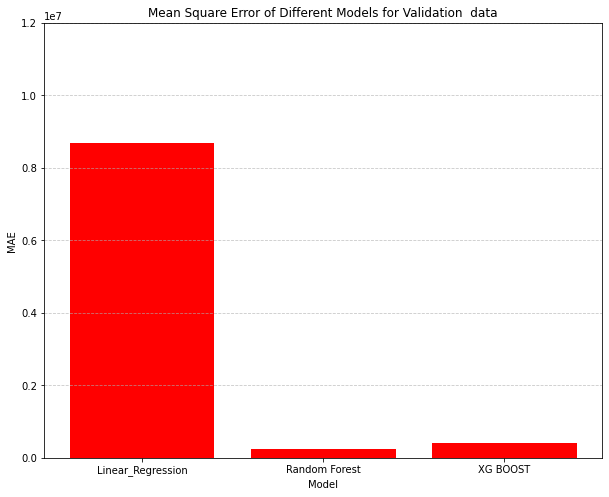

In [186]:
#Camparing the Matrix for all models with different data for Mean Square Error
def bar_plot_MSE():
    C = [df_test,df_train,df_validation]
    chart = ['Test ','Train ','Validation ']
    i = 0
    for c in C:
        df = c
#         df.set_index('Model', inplace=True)

        # Extract model names and R-squared values
        models = df.index
        r_squared_values = df['MSE']

        # Create a bar chart
        plt.figure(figsize=(10, 8))
        plt.bar(models, r_squared_values, color='red')

        # Customize the chart
        plt.xlabel('Model')
        plt.ylabel('MAE')
        plt.title('Mean Square Error of Different Models for {} data'.format(chart[i]))
        i += 1
        # Set the y-axis range from 0 t0 9000000
        plt.ylim(0, 12000000)

        # Add grid lines for better readability
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Display the chart
        plt.show()
bar_plot_MSE()

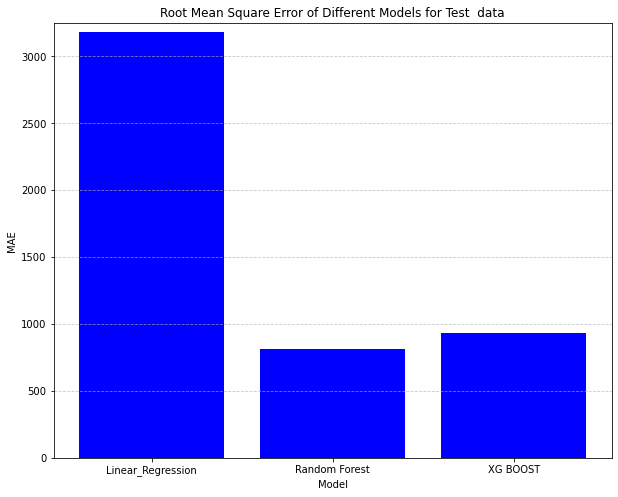

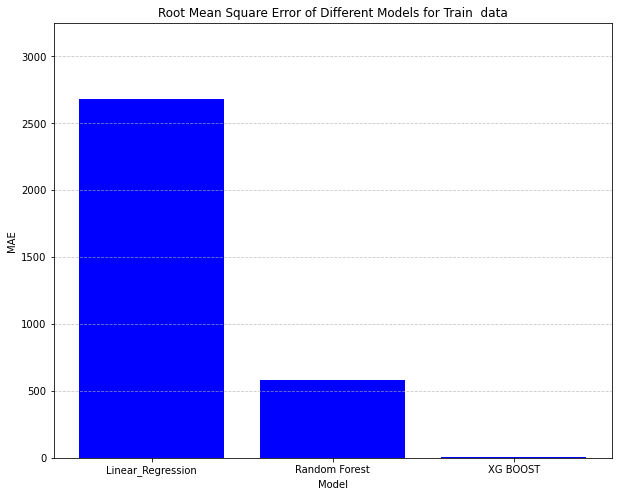

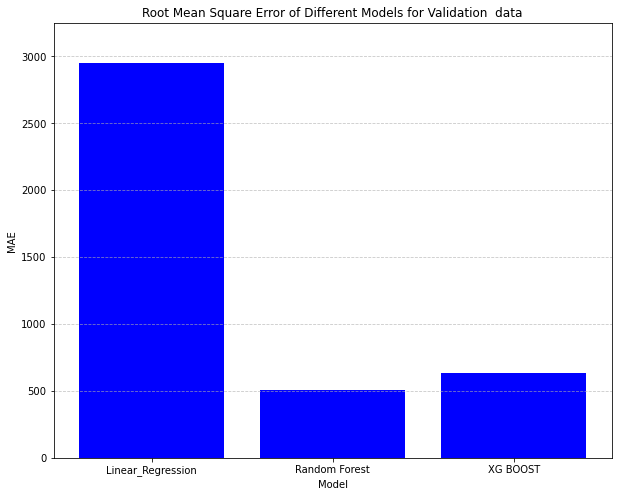

In [187]:
#Camparing the Matrix for all models with different data for Root Mean Square Error 
def bar_plot_RMSE():
    C = [df_test,df_train,df_validation]
    chart = ['Test ','Train ','Validation ']
    i = 0
    for c in C:
        df = c
#         df.set_index('Model', inplace=True)

        # Extract model names and R-squared values
        models = df.index
        r_squared_values = df['RMSE']

        # Create a bar chart
        plt.figure(figsize=(10, 8))
        plt.bar(models, r_squared_values, color='blue')

        # Customize the chart
        plt.xlabel('Model')
        plt.ylabel('MAE')
        plt.title('Root Mean Square Error of Different Models for {} data'.format(chart[i]))
        i += 1
        # Set the y-axis range from 0 t0 3250
        plt.ylim(0, 3250)

        # Add grid lines for better readability
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Display the chart
        plt.show()
bar_plot_RMSE()

In [ ]:
# In Conclusion The Random Forest Model is the best fit model for this type pf data Becasuse the XG Boost model may give better performance on the train data but its performance for test and validation data is lower than Random forest and this indicates that the random forest model may have been overfitted 